In [43]:
library(tidyverse)
library(dbscan)

In [1]:
titanic <- read.csv('../../data/titanic/titanic.csv')
head(titanic, 5)

Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
22,,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
38,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1,female,1,1,PC 17599
26,,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
35,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
35,,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [2]:
str(titanic)

'data.frame':	1309 obs. of  12 variables:
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ Cabin      : Factor w/ 187 levels "","A10","A11",..: 1 108 1 72 1 1 165 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 156 287 531 430 23 826 775 922 613 855 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Ticket     : Factor w/ 929 levels "110152","110413",..: 721 817 915 66 650 374 110 542 478 175 ...


In [33]:
titanic_unsupervised <- titanic %>%
mutate(Cabin = as.numeric(Cabin),
      Embarked = as.numeric(Embarked),
      Sex = as.numeric(Sex),
      Survived = as.factor(Survived)) %>%
filter(is.na(Fare) == FALSE) 

titanic_unsupervised$Age[is.na(titanic_unsupervised$Age)] <- 
as.integer(mean(titanic_unsupervised$Age, na.rm = TRUE))

titanic_for_kmeans <- titanic_unsupervised%>%
select( -c(Name, PassengerId, Ticket, Survived))

head(titanic_for_kmeans, 3)

Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
22,1,4,7.2500,0,3,2,1
38,108,2,71.2833,0,1,1,1
26,1,4,7.9250,0,3,1,0


In [34]:
summary(titanic_for_kmeans)

      Age            Cabin           Embarked          Fare        
 Min.   : 0.17   Min.   :  1.00   Min.   :1.000   Min.   :  0.000  
 1st Qu.:22.00   1st Qu.:  1.00   1st Qu.:3.000   1st Qu.:  7.896  
 Median :29.00   Median :  1.00   Median :4.000   Median : 14.454  
 Mean   :29.68   Mean   : 23.06   Mean   :3.489   Mean   : 33.295  
 3rd Qu.:35.00   3rd Qu.:  1.00   3rd Qu.:4.000   3rd Qu.: 31.275  
 Max.   :80.00   Max.   :187.00   Max.   :4.000   Max.   :512.329  
     Parch            Pclass           Sex            SibSp       
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :3.000   Median :2.000   Median :0.0000  
 Mean   :0.3853   Mean   :2.294   Mean   :1.644   Mean   :0.4992  
 3rd Qu.:0.0000   3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:1.0000  
 Max.   :9.0000   Max.   :3.000   Max.   :2.000   Max.   :8.0000  

# kmeans clustering


In [40]:
k <- kmeans(titanic_for_kmeans, centers = 2, nstart = 10)

titanic_unsupervised$cluster <- k$cluster
head(titanic_unsupervised, 5)

Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,cluster
22,1,4,7.2500,"Braund, Mr. Owen Harris",0,1,3,2,1,0,A/5 21171,2
38,108,2,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,2,1,1,1,1,PC 17599,1
26,1,4,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,2
35,72,4,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1
35,1,4,8.0500,"Allen, Mr. William Henry",0,5,3,2,0,0,373450,2


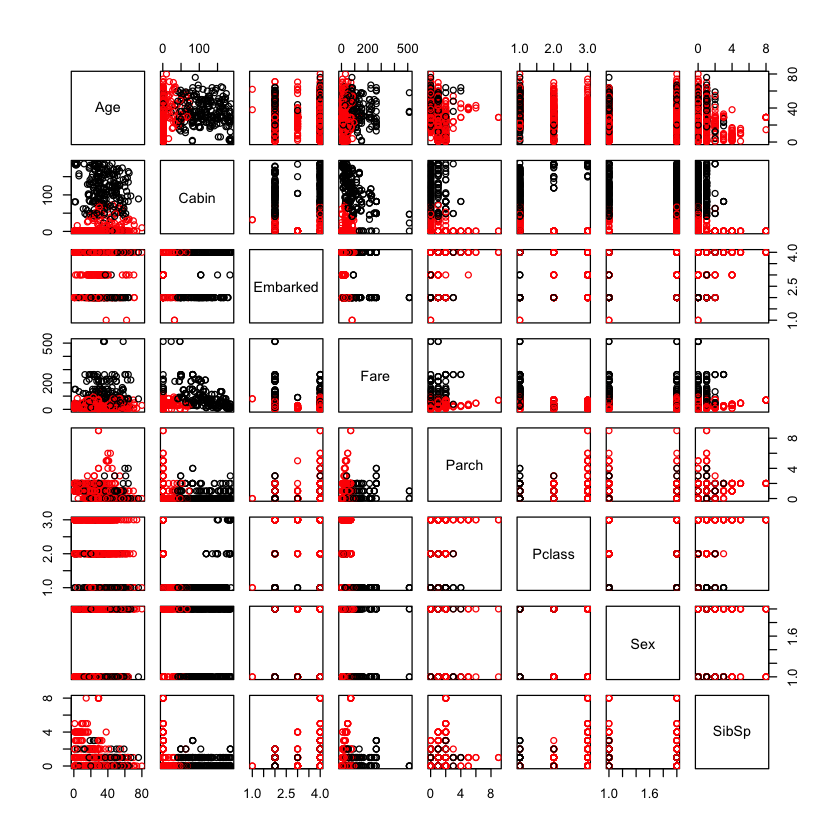

In [42]:
plot(titanic_for_kmeans, col = k$cluster)

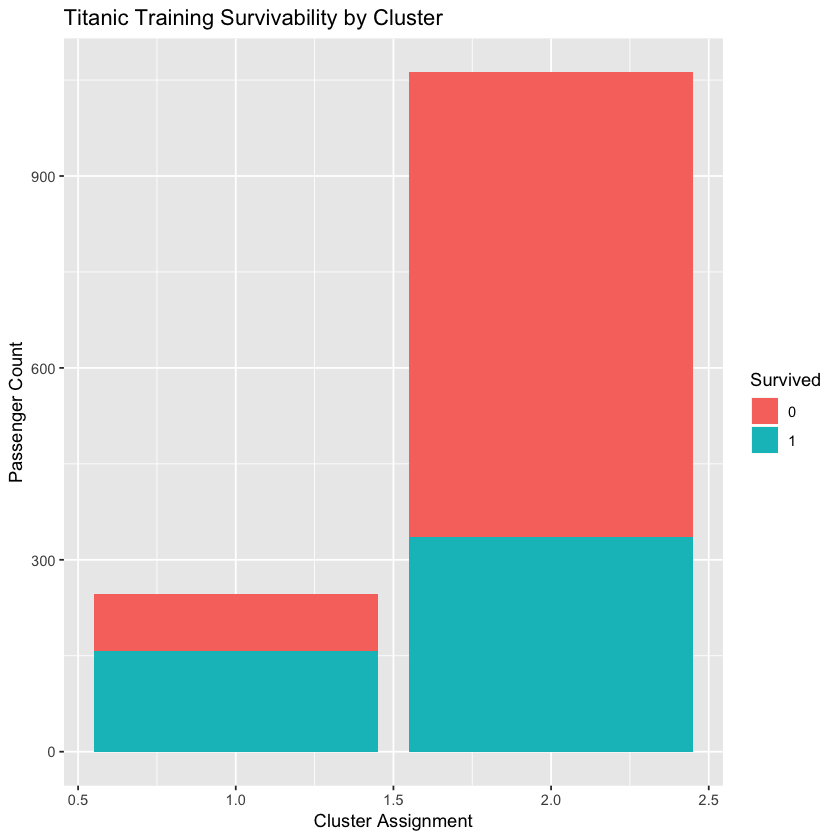

In [41]:
ggplot(titanic_unsupervised, aes(x = cluster, fill = Survived)) +
  #theme_bw() +
  geom_bar() +
  labs(x = "Cluster Assignment",
       y = "Passenger Count",
       title = "Titanic Training Survivability by Cluster")

# DBSCAN

Density-Based Spatial Clustering of Applications with Noise

In [49]:
db <- dbscan(titanic_for_kmeans, eps = .4, minPts = 15)

In [50]:
db

DBSCAN clustering for 1308 objects.
Parameters: eps = 0.4, minPts = 15
The clustering contains 4 cluster(s) and 1186 noise points.

   0    1    2    3    4 
1186   16   26   55   25 

Available fields: cluster, eps, minPts

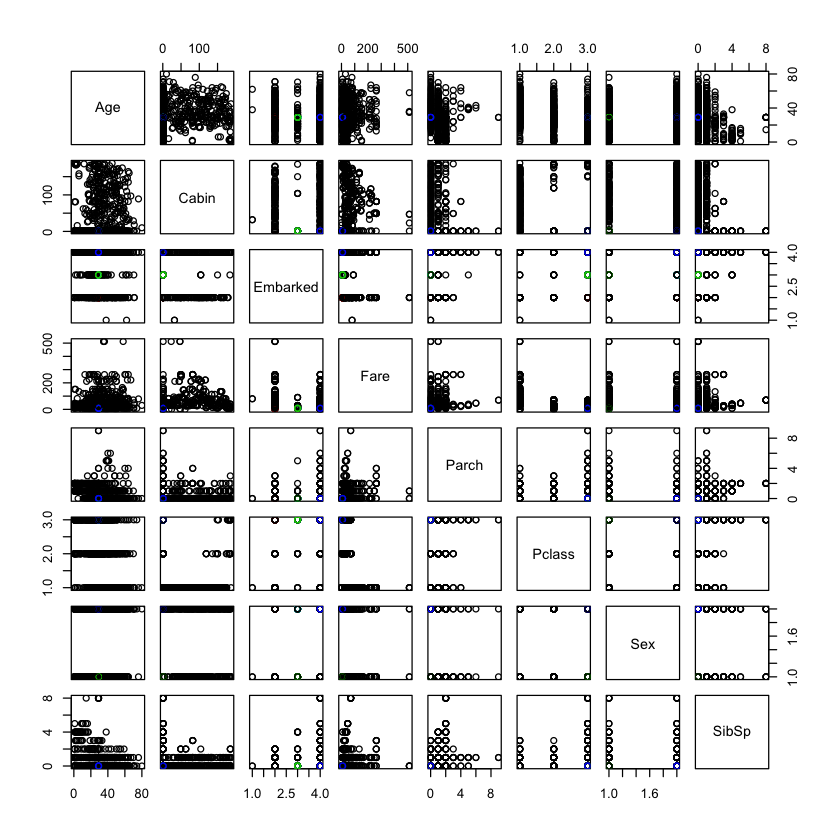

In [51]:
pairs(titanic_for_kmeans, col = db$cluster + 1L)

# PCA


In [ ]:
In R, we can use the prcomp function.

Let’s explore PCA on the iris data. While it contains only 4 variables, is already becomes difficult to visualise the 3 groups along all these dimensions.

pairs(iris[, -5], col = iris[, 5], pch = 19)

In [1]:
Let’s use PCA to reduce the dimension.

irispca <- prcomp(iris[, -5])
summary(irispca)
## Importance of components:
##                           PC1     PC2    PC3     PC4
## Standard deviation     2.0563 0.49262 0.2797 0.15439
## Proportion of Variance 0.9246 0.05307 0.0171 0.00521
## Cumulative Proportion  0.9246 0.97769 0.9948 1.00000
A summary of the prcomp output shows that along PC1 along, we are able to retain over 92% of the total variability in the data.

ERROR: Error in unlist(str_split(x, "\n"), recursive = FALSE, use.names = FALSE): lazy-load database '/Library/Frameworks/R.framework/Versions/3.4/Resources/library/stringr/R/stringr.rdb' is corrupt
